# KNN with sklearn and from scratch
## 1. with sklearn


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets


In [8]:
n_neighbors = 3
# import data
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [9]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

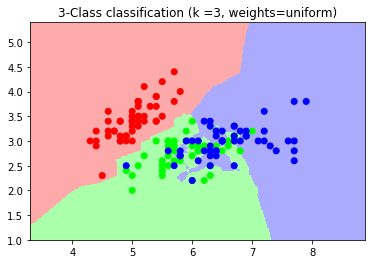

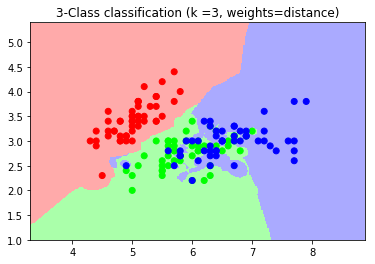

In [17]:
h = 0.02
for weights in ['uniform','distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights = weights)
    clf.fit(X,y)
    # 绘制决策边界。为此，我们将为每个分配一个颜色
    # 来绘制网格中的点 [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:,0].min() -1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min,x_max,h),
                        np.arange(y_min,y_max,h))
    Z = clf.predict(np.c_[xx.ravel(),yy.ravel()])
    
    # put result into a colormap
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx,yy,Z,cmap = cmap_light)
    
    # plot training pts
    plt.scatter(X[:,0],X[:,1],c=y, cmap=cmap_bold)
    plt.xlim(xx.min(),xx.max())
    plt.ylim(y_min,y_max)
    plt.title(f"3-Class classification (k ={n_neighbors}, weights={weights})")
plt.show()

## 2. KNN from scratch

In [21]:
import operator
import os
from collections import Counter


In [22]:
def createDataSet():
    """
    Desc:
        创建数据集和标签
    Args:
        None
    Returns:
        group -- 训练数据集的 features
        labels -- 训练数据集的 labels
    调用方式
    import kNN
    group, labels = createDataSet()
    """
    group = array([[1.0, 1.1], [1.0, 1.0], [0, 0], [0, 0.1]])
    labels = ['A', 'A', 'B', 'B']
    return group, labels



In [23]:
def knn0(inX,dataSet,labels,k):
    """
    Desc:
        kNN 的分类函数
    Args:
        inX -- 用于分类的输入向量/测试数据
        dataSet -- 训练数据集的 features
        labels -- 训练数据集的 labels
        k -- 选择最近邻的数目
    Returns:
        sortedClassCount[0][0] -- 输入向量的预测分类 labels

    注意：labels元素数目和dataSet行数相同；程序使用欧式距离公式.

    预测数据所在分类可在输入下列命令
    kNN.classify0([0,0], group, labels, 3)
    """
    dataSetSize = dataSet.shape[0]
    diffMat = tile(inX,(dataSetSize,1)) - dataSet
    sqDiffMat = diffMat**2
    sqDistances = sqDiffMat.sum(axis=1)
    distances = sqDistances ** 0.5
    # 根据距离排序从小到大的排序，返回对应的索引位置
    # argsort() 是将x中的元素从小到大排列，提取其对应的index（索引），然后输出到y。
    # 例如：y=array([3,0,2,1,4,5]) 则，x[3]=1最小，所以y[0]=3;x[5]=5最大，所以y[5]=5。
    # print 'distances=', distances
    sortedDistIndicies = distances.argsort()
    # print 'distances.argsort()=', sortedDistIndicies
    # chose the top k pts with shortest distance:
    classCount = {}
    for i in range(k):
        voteILabel = labels[sortedDistIndicies[i]]
        # 在字典中将该类型加一
        # 字典的get方法
        # 如：list.get(k,d) 其中 get相当于一条if...else...语句,参数k在字典中，字典将返回list[k];如果参数k不在字典中则返回参数d,如果K在字典中则返回k对应的value值
        # l = {5:2,3:4}
        # print l.get(3,0)返回的值是4；
        # Print l.get（1,0）返回值是0；
        classCount[voteILabel] = classCount.get(voteILabel,0) +1
    # 3. 排序并返回出现最多的那个类型
    # 字典的 items() 方法，以列表返回可遍历的(键，值)元组数组。
    # 例如：dict = {'Name': 'Zara', 'Age': 7}   print "Value : %s" %  dict.items()   Value : [('Age', 7), ('Name', 'Zara')]
    # sorted 中的第2个参数 key=operator.itemgetter(1) 这个参数的意思是先比较第几个元素
    # 例如：a=[('b',2),('a',1),('c',0)]  b=sorted(a,key=operator.itemgetter(1)) >>>b=[('c',0),('a',1),('b',2)] 可以看到排序是按照后边的0,1,2进行排序的，而不是a,b,c
    # b=sorted(a,key=operator.itemgetter(0)) >>>b=[('a',1),('b',2),('c',0)] 这次比较的是前边的a,b,c而不是0,1,2
    # b=sorted(a,key=opertator.itemgetter(1,0)) >>>b=[('c',0),('a',1),('b',2)] 这个是先比较第2个元素，然后对第一个元素进行排序，形成多级排序。
    sortedClassCount = sorted(classCount.items(), key=operator.itemgetter(1), reverse=True)
    return sortedClassCount[0][0]
        

In [32]:
def knn1(inX,dataSet,labels,k):
    # ------------------------------------------------------------------------------------------------------------------------------------------
    # 实现 classify0() 方法的第二种方式

    # """
    # 1. 计算距离
    
    # 欧氏距离： 点到点之间的距离
    #    第一行： 同一个点 到 dataSet的第一个点的距离。
    #    第二行： 同一个点 到 dataSet的第二个点的距离。
    #    ...
    #    第N行： 同一个点 到 dataSet的第N个点的距离。

    # [[1,2,3],[1,2,3]]-[[1,2,3],[1,2,0]]
    # (A1-A2)^2+(B1-B2)^2+(c1-c2)^2
    
    # inx - dataset 使用了numpy broadcasting，见 https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html
    # np.sum() 函数的使用见 https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sum.html
    # """
    dist = np.sum((inX - dataSet)**2, axis=1)**0.5
    
    # """
    # 2. k个最近的标签
    
    # 对距离排序使用numpy中的argsort函数， 见 https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.sort.html#numpy.sort
    # 函数返回的是索引，因此取前k个索引使用[0 : k]
    # 将这k个标签存在列表k_labels中
    # """
    k_labels = [labels[index] for index in dist.argsort()[0 : k]]
    #
    # 3. 出现次数最多的标签即为最终类别
    
    # 使用collections.Counter可以统计各个标签的出现次数，most_common返回出现次数最多的标签tuple，例如[('lable1', 2)]，因此[0][0]可以取出标签值
    # """
    label = Counter(k_labels).most_common(1)[0][0]
    return label

In [27]:
group, labels = createDataSet()
inX = [0,1]
dataSet = group
k = 3

In [33]:
pred0 = knn0(inX,dataSet,labels,k)
print(f'pred0 = {pred0}')
pred1 = knn1(inX,dataSet,labels,k)
print(f'pred1 = {pred1}')

pred0 = B
pred1 = B
